# Proyecto 1er Parcial - Análisis de Datos
**Facultad de Ingeniería en Ciencias de la Tierra**

*Maestría en Ciencias de la Tierra*

**Nombre:** [Jabid Martínez](https://www.linkedin.com/in/jorge-jabid-martinez-angulo/)

# Análisis y Visualización de Datos

# Introducción

Python es crucial en el análisis y visualización de datos debido a su accesibilidad, potente conjunto de librerías (como pandas, NumPy, Matplotlib y Seaborn), y un entorno interactivo como JupyterLab. Estas herramientas permiten manipular, analizar y visualizar grandes volúmenes de datos de manera eficiente, automatizar procesos para minimizar errores y ahorrar tiempo, y facilitar la colaboración y reproducibilidad de resultados. Además, la adaptabilidad de Python permite su integración con otras herramientas y lenguajes, haciendo posible descubrir, interpretar y comunicar información crítica en diversos campos de investigación.


# Objetivo

Realizar un análisis de un conjunto de datos de elección libre, preferible con algún enfoque en geociencias, utilizando las librerías de Python numpy, pandas, matplotlib, seaborn, entre otras, para identificar tendencias y observaciones importantes de los datos.

## Carga de datos y librerías a utilizar
Las librerías a utilizar en este proyecto son de dos tipos, aquellas necesarias para la de datos, . Por otro lado, **matplotlib** y **seaborn** serán útiles en la representación gráfica del conjunto de datos, 

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

### 1) Elección y descripción del conjunto de datos
Se escogió una base de datos bibliométrica tipo csv de Scopus y otra de WOS, obtenidas usando los términos de busqueda o variables: trasvase de agua e impacto ambiental, con sus sinónimos o equivalentes en inglés.

### 3) Carga y procesamiento de datos

In [82]:
# Carga de base de datos Scopus
scopus = pd.read_csv("scopus.csv")

#Carga de base de datos Web of Science
wos = pd.read_excel('WOS.xlsx')

In [83]:
# Visualización de datos Scopus, 5 primeras filas
scopus.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Kutter M.; Greve C.; Maier M.; Schilling M.; M...,"Kutter, Maximilian (57203098308); Greve, Chris...",57203098308; 57235736900; 57201278292; 5769745...,Recycling of perfluorosulfonic acid-based memb...,2024,Journal of Membrane Science,693,NaN,122370,NaN,...,NaN,JMESD,NaN,English,J. Membr. Sci.,Article,Final,NaN,Scopus,2-s2.0-85180402885
1,Zhang X.; Zheng Z.; Qiao W.; Huang J.; Xiao Y.,"Zhang, Xianqi (9248524100); Zheng, Zhiwen (571...",9248524100; 57194573920; 57732618200; 58081116...,Characteristics of ecosystem service values in...,2023,Environmental Monitoring and Assessment,195,10,1151,NaN,...,NaN,EMASD,37670176.0,English,Environ. Monit. Assess.,Article,Final,NaN,Scopus,2-s2.0-85169765543
2,Sarabia-Escriva E.-J.; Soto-Francés V.-M.; Pin...,"Sarabia-Escriva, Emilio-José (40762296500); So...",40762296500; 6508354657; 6603705316; 7801621970,Economic and environmental analysis of domesti...,2023,Energy and Buildings,286,NaN,112925,NaN,...,NaN,ENEBD,NaN,English,Energy Build.,Article,Final,NaN,Scopus,2-s2.0-85149392859
3,Clayton J.G.; Mejía-Marchena R.L.; Jiang D.; T...,"Clayton, Jonathan G. (58945214200); Mejía-Marc...",58945214200; 57219107679; 57193787649; 5719351...,Delayed pipe replacement halves environmental ...,2024,AWWA Water Science,6,2,e1366,NaN,...,NaN,NaN,NaN,English,AWWA Water Sci.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85188065648
4,Xiong L.; Jiang Y.; Li X.; Ren D.; Huang G.,"Xiong, Lvyang (57207105566); Jiang, Yao (56331...",57207105566; 56331740600; 58871185400; 5670686...,Long-term regional groundwater responses and t...,2023,Agricultural Water Management,288,NaN,108493,NaN,...,NaN,AWMAD,NaN,English,Agric. Water Manage.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85168803133


In [84]:
# Visualización de datos WOS, 5 primeras filas
wos.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Zhai, SJ; Hu, WP; Zhu, ZC",NaN,NaN,NaN,"Zhai, Shuijing; Hu, Weiping; Zhu, Zecong",NaN,NaN,Ecological impacts of water transfers on Lake ...,ECOLOGICAL ENGINEERING,...,Science Citation Index Expanded (SCI-EXPANDED),Environmental Sciences & Ecology; Engineering,578JU,NaN,NaN,NaN,NaN,2024-06-25,WOS:000276290400008,View Full Record in Web of Science
1,J,"Yan, HL; Lin, YQ; Chen, QW; Zhang, JY; He, SF;...",NaN,NaN,NaN,"Yan, Hanlu; Lin, Yuqing; Chen, Qiuwen; Zhang, ...",NaN,NaN,A Review of the Eco-Environmental Impacts of t...,ENGINEERING,...,Science Citation Index Expanded (SCI-EXPANDED),Engineering,JB3I8,NaN,gold,NaN,NaN,2024-06-25,WOS:001170650700001,View Full Record in Web of Science
2,J,"Yan, DH; Wang, H; Li, HH; Wang, G; Qin, TL; Wa...",NaN,NaN,NaN,"Yan, D. H.; Wang, H.; Li, H. H.; Wang, G.; Qin...",NaN,NaN,Quantitative analysis on the environmental imp...,HYDROLOGY AND EARTH SYSTEM SCIENCES,...,Science Citation Index Expanded (SCI-EXPANDED),Geology; Water Resources,998ND,NaN,"Green Submitted, gold",NaN,NaN,2024-06-25,WOS:000308245800020,View Full Record in Web of Science
3,J,"Lin, C; Suh, S; Pfister, S",NaN,NaN,NaN,"Lin, Chen; Suh, Sangwon; Pfister, Stephan",NaN,NaN,Does South-to-North Water Transfer Reduce the ...,JOURNAL OF INDUSTRIAL ECOLOGY,...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Engineeri...,989EU,NaN,NaN,NaN,NaN,2024-06-25,WOS:000307543900017,View Full Record in Web of Science
4,J,"Lin, ML; Lek, S; Ren, P; Li, SH; Li, W; Du, X;...",NaN,NaN,NaN,"Lin, M. -L.; Lek, S.; Ren, P.; Li, S. -H.; Li,...",NaN,NaN,Predicting impacts of south-to-north water tra...,JOURNAL OF APPLIED ICHTHYOLOGY,...,Science Citation Index Expanded (SCI-EXPANDED),Fisheries; Marine & Freshwater Biology,EV0KV,NaN,gold,NaN,NaN,2024-06-25,WOS:000401429400012,View Full Record in Web of Science


# Metodología

Se cargaron las dos bases de datos, y se procedió con la limpieza quitando columnas irrelevantes, luego se igualaron los nombres de los encabezados para concatenar ambos dataframes con el método concat(), se eliminaron duplicados usando el método dropna() teniendo en cuenta titulos de papers y DOI, se analizó los tipos de datos con info() y la estadística basica con describe(), para número de citas y número de publicaciones, que se graficaron además para analizar su cambió a través de los años y estimar tendencias, algunos de estos procesos se implementaron luego como funciones, se identificó el top 20 de palabras clave por autor y nube de palabras, finalmente se generaron gráficos de distribución por numero de citas, tipo de documento y editorial


In [85]:
# Limpieza de datos Scopus

# Selecciona las columnas relevantes
columnas_relevantes_scopus = ['Authors', 'Title', 'Year', 'Source title', 'Cited by', 'DOI', 'Affiliations', 'Author Keywords', 'Publisher', 'Language of Original Document', 'Document Type']

# Filtra el DataFrame para mantener solo las columnas relevantes
df_scopus = scopus[columnas_relevantes_scopus]

In [86]:
#Limpieza de datos WOS

# Selecciona las columnas relevantes
columnas_relevantes_wos = ['Authors', 'Article Title', 'Publication Year', 'Source Title', 'Times Cited, All Databases', 'DOI', 'Affiliations', 'Author Keywords', 'Publisher', 'Language', 'Document Type']

# Filtra el DataFrame para mantener solo las columnas relevantes
df_wos = wos[columnas_relevantes_wos]

In [87]:
# Renombrar columnas en Scopus DataFrame
df_scopus.rename(columns={
    'Language of Original Document': 'Language'}, inplace=True)

# Renombrar columnas en WoS DataFrame
df_wos.rename(columns={
    'Article Title': 'Title', 
    'Publication Year': 'Year',
    'Times Cited, All Databases': 'Cited by'}, inplace=True)

In [88]:
# Combinación de las dos bases de datos con las columnas de interés
df_combined = pd.concat([df_scopus, df_wos], ignore_index=True)

In [89]:
# DataFrame combinado
df_combined

,Authors,Title,Year,Source title,Cited by,DOI,Affiliations,Author Keywords,Publisher,Language,Document Type,Source Title
0,Kutter M.; Greve C.; Maier M.; Schilling M.; M...,Recycling of perfluorosulfonic acid-based memb...,2024,Journal of Membrane Science,0,10.1016/j.memsci.2023.122370,"Electrochemical Process Engineering, Universit...",In-situ Raman; PEM fuel cells; PFSA recycling;...,Elsevier B.V.,English,Article,NaN
1,Zhang X.; Zheng Z.; Qiao W.; Huang J.; Xiao Y.,Characteristics of ecosystem service values in...,2023,Environmental Monitoring and Assessment,0,10.1007/s10661-023-11777-7,North China University of Water Resources and ...,Central Line Project for South-to-North Water ...,Springer Science and Business Media Deutschlan...,English,Article,NaN
2,Sarabia-Escriva E.-J.; Soto-Francés V.-M.; Pin...,Economic and environmental analysis of domesti...,2023,Energy and Buildings,4,10.1016/j.enbuild.2023.112925,"Termodinàmica Aplicada, Universitat Politècnic...",Building energy efficiency; Decarbonisation; D...,Elsevier Ltd,English,Article,NaN
3,Clayton J.G.; Mejía-Marchena R.L.; Jiang D.; T...,Delayed pipe replacement halves environmental ...,2024,AWWA Water Science,0,10.1002/aws2.1366,"Department of Civil, Construction, and Environ...",life cycle analysis; pipe break prediction; pi...,John Wiley and Sons Inc,English,Article,NaN
4,Xiong L.; Jiang Y.; Li X.; Ren D.; Huang G.,Long-term regional groundwater responses and t...,2023,Agricultural Water Management,4,10.1016/j.agwat.2023.108493,"School of Infrastructure Engineering, Nanchang...",Groundwater depth; Groundwater salinity; Mann-...,Elsevier B.V.,English,Article,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1762,"Hu, ZH; Liu, M; Wang, YX; Ye, MS; Li, SX",Geophysical Assessment of Freshwater Intrusion...,2022,NaN,2,10.32389/JEEG21-012,Hohai University; Shandong University,NaN,ENVIRONMENTAL ENGINEERING GEOPHYSICAL SOC,English,Article,JOURNAL OF ENVIRONMENTAL AND ENGINEERING GEOPH...
1763,"Parvez, MT; Mohsin, ABM; Arnob, SS; Lucas, MC;...",Fish diversity decline in the lower Gangetic p...,2023,NaN,4,10.1007/s10531-022-02505-7,University of Rajshahi; University of Dhaka; D...,Climate change; River barriers; Fisheries; Sil...,SPRINGER,English,Article,BIODIVERSITY AND CONSERVATION
1764,"Restrepo, JD; Kettner, A",Human induced discharge diversion in a tropica...,2012,NaN,29,10.1016/j.jhydrol.2011.12.037,Universidad EAFIT; University of Colorado Syst...,Patia River; Hydrologic alteration; River dive...,ELSEVIER,English,Article,JOURNAL OF HYDROLOGY
1765,"Stromberg, JC; Beauchamp, VB; Dixon, MD; Lite,...",Importance of low-flow and high-flow character...,2007,NaN,325,10.1111/j.1365-2427.2006.01713.x,Arizona State University; Arizona State Univer...,arid; flood hydrograph; Gila River basin; grou...,WILEY,English,Review,FRESHWATER BIOLOGY


In [90]:
# Elimina filas duplicadas
df_combined.drop_duplicates(subset=['Title'], keep='first', inplace=True)


In [91]:
# DataFrame sin títulos duplicados
df_combined

,Authors,Title,Year,Source title,Cited by,DOI,Affiliations,Author Keywords,Publisher,Language,Document Type,Source Title
0,Kutter M.; Greve C.; Maier M.; Schilling M.; M...,Recycling of perfluorosulfonic acid-based memb...,2024,Journal of Membrane Science,0,10.1016/j.memsci.2023.122370,"Electrochemical Process Engineering, Universit...",In-situ Raman; PEM fuel cells; PFSA recycling;...,Elsevier B.V.,English,Article,NaN
1,Zhang X.; Zheng Z.; Qiao W.; Huang J.; Xiao Y.,Characteristics of ecosystem service values in...,2023,Environmental Monitoring and Assessment,0,10.1007/s10661-023-11777-7,North China University of Water Resources and ...,Central Line Project for South-to-North Water ...,Springer Science and Business Media Deutschlan...,English,Article,NaN
2,Sarabia-Escriva E.-J.; Soto-Francés V.-M.; Pin...,Economic and environmental analysis of domesti...,2023,Energy and Buildings,4,10.1016/j.enbuild.2023.112925,"Termodinàmica Aplicada, Universitat Politècnic...",Building energy efficiency; Decarbonisation; D...,Elsevier Ltd,English,Article,NaN
3,Clayton J.G.; Mejía-Marchena R.L.; Jiang D.; T...,Delayed pipe replacement halves environmental ...,2024,AWWA Water Science,0,10.1002/aws2.1366,"Department of Civil, Construction, and Environ...",life cycle analysis; pipe break prediction; pi...,John Wiley and Sons Inc,English,Article,NaN
4,Xiong L.; Jiang Y.; Li X.; Ren D.; Huang G.,Long-term regional groundwater responses and t...,2023,Agricultural Water Management,4,10.1016/j.agwat.2023.108493,"School of Infrastructure Engineering, Nanchang...",Groundwater depth; Groundwater salinity; Mann-...,Elsevier B.V.,English,Article,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1756,"Gain, AK; Giupponi, C",Impact of the Farakka Dam on Thresholds of the...,2014,NaN,76,10.3390/w6082501,Universita Ca Foscari Venezia,threshold; river flow; range of variability (R...,MDPI,English,Article,WATER
1757,"Smith, JA; Handley, JC; Dietl, GP",eEde predator-prey interactions,2018,NaN,10,10.1098/rspb.2018.0724,Cornell University,Manly's alpha; Mulinia; Naticidae; predator pr...,ROYAL SOC,English,Article,PROCEEDINGS OF THE ROYAL SOCIETY B-BIOLOGICAL ...
1759,"Zhang, HY; Wang, XS; Zhang, J; Gu, XF; Yin, LH...",Spatial-temporal variations in vegetation with...,2023,NaN,0,10.1002/eco.2546,China University of Geosciences; Chinese Acade...,arid land; ecological water conveyance; Kongqi...,WILEY,English,Article,ECOHYDROLOGY
1764,"Restrepo, JD; Kettner, A",Human induced discharge diversion in a tropica...,2012,NaN,29,10.1016/j.jhydrol.2011.12.037,Universidad EAFIT; University of Colorado Syst...,Patia River; Hydrologic alteration; River dive...,ELSEVIER,English,Article,JOURNAL OF HYDROLOGY


In [92]:
# Eliminación de duplicados basados en el DOI, preservando las filas sin DOI
df_combined_with_doi = df_combined.dropna(subset=['DOI'])
df_combined_without_doi = df_combined[df_combined['DOI'].isna()]

# Eliminación de duplicados en el conjunto de datos con DOI
df_combined_with_doi = df_combined_with_doi.drop_duplicates(subset=['DOI'], keep='first')

# Combina nuevamente los conjuntos de datos
df_combined_cleaned = pd.concat([df_combined_with_doi, df_combined_without_doi], ignore_index=True)

In [93]:
# DataFrame sin DOI duplicado
df_combined_cleaned

,Authors,Title,Year,Source title,Cited by,DOI,Affiliations,Author Keywords,Publisher,Language,Document Type,Source Title
0,Kutter M.; Greve C.; Maier M.; Schilling M.; M...,Recycling of perfluorosulfonic acid-based memb...,2024,Journal of Membrane Science,0,10.1016/j.memsci.2023.122370,"Electrochemical Process Engineering, Universit...",In-situ Raman; PEM fuel cells; PFSA recycling;...,Elsevier B.V.,English,Article,NaN
1,Zhang X.; Zheng Z.; Qiao W.; Huang J.; Xiao Y.,Characteristics of ecosystem service values in...,2023,Environmental Monitoring and Assessment,0,10.1007/s10661-023-11777-7,North China University of Water Resources and ...,Central Line Project for South-to-North Water ...,Springer Science and Business Media Deutschlan...,English,Article,NaN
2,Sarabia-Escriva E.-J.; Soto-Francés V.-M.; Pin...,Economic and environmental analysis of domesti...,2023,Energy and Buildings,4,10.1016/j.enbuild.2023.112925,"Termodinàmica Aplicada, Universitat Politècnic...",Building energy efficiency; Decarbonisation; D...,Elsevier Ltd,English,Article,NaN
3,Clayton J.G.; Mejía-Marchena R.L.; Jiang D.; T...,Delayed pipe replacement halves environmental ...,2024,AWWA Water Science,0,10.1002/aws2.1366,"Department of Civil, Construction, and Environ...",life cycle analysis; pipe break prediction; pi...,John Wiley and Sons Inc,English,Article,NaN
4,Xiong L.; Jiang Y.; Li X.; Ren D.; Huang G.,Long-term regional groundwater responses and t...,2023,Agricultural Water Management,4,10.1016/j.agwat.2023.108493,"School of Infrastructure Engineering, Nanchang...",Groundwater depth; Groundwater salinity; Mann-...,Elsevier B.V.,English,Article,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1494,Parnarouskis Michael; Potts Richard G.,INTERACTIVE HAZARDOUS CHEMICAL SPILL SIMULATION.,1983,Simulation Series,0,NaN,"US Coast Guard Headquarters,, Washington, DC, ...",NaN,Soc for Computer Simulation,English,Conference paper,NaN
1495,"Yamaguchi, Y; Nagamiya, T; Aoyama, N; Takeno, M",Environmental Strategy of Fujitsu Group,2014,NaN,0,NaN,NaN,NaN,FUJITSU LTD,English,Article,FUJITSU SCIENTIFIC & TECHNICAL JOURNAL
1496,"Elwadie, MEM; Mao, LL; Bralts, VF",A SIMPLIFIED METHOD FOR FIELD EVALUATION OF SO...,2010,NaN,3,NaN,Purdue University System; Purdue University; C...,Sprinkler irrigation; Field evaluation; Statis...,AMER SOC AGRICULTURAL & BIOLOGICAL ENGINEERS,English,Article,APPLIED ENGINEERING IN AGRICULTURE
1497,"Squillace, M",Water Transfers for a Changing Climate,2013,NaN,14,NaN,University of Colorado System; University of C...,NaN,"UNIV NEW MEXICO, SCH LAW",English,Article,NATURAL RESOURCES JOURNAL


In [94]:
# Visualización de tipo de datos
df_combined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Authors          1478 non-null   object
 1   Title            1499 non-null   object
 2   Year             1499 non-null   int64 
 3   Source title     1473 non-null   object
 4   Cited by         1499 non-null   int64 
 5   DOI              1236 non-null   object
 6   Affiliations     1432 non-null   object
 7   Author Keywords  1099 non-null   object
 8   Publisher        1060 non-null   object
 9   Language         1499 non-null   object
 10  Document Type    1499 non-null   object
 11  Source Title     15 non-null     object
dtypes: int64(2), object(10)
memory usage: 140.7+ KB


In [95]:
# Los tipos de datos son correctos

### 4) Análisis exploratorio de Datos (EDA)

In [96]:
# Estadística básica correspondiente al número de citas
df_combined_cleaned.drop(columns=['Year']).describe()

,Cited by
count,1499.000000
mean,32.457638
std,102.393355
min,0.000000
25%,1.000000
50%,10.000000
75%,32.000000
max,2163.000000


In [97]:
# Contar el número de publicaciones por año y generar estadística básica
publicaciones_por_anio = df_combined_cleaned.groupby('Year').size()
publicaciones_por_anio.drop(columns=['Year']).describe()

count     52.000000
mean      28.826923
std       28.104651
min        1.000000
25%        5.000000
50%       19.000000
75%       44.250000
max      104.000000
dtype: float64

# Resultados principales y visualizaciones
Los resultados indican una tendencia lineal en el incremento de publicaciones relacionadas a trasvases de agua e impactos ecológicos, se observan picos en las citas por año, especificamente en los años 2005, 2006 y 2016 que refleja un aumento de interés por el tema, debido a razones que tendrían que investigarse a profundidad, se identificó el top de palabras clave relacionadas al tema y distribuvión por número de citas, tipo de documento y editorial

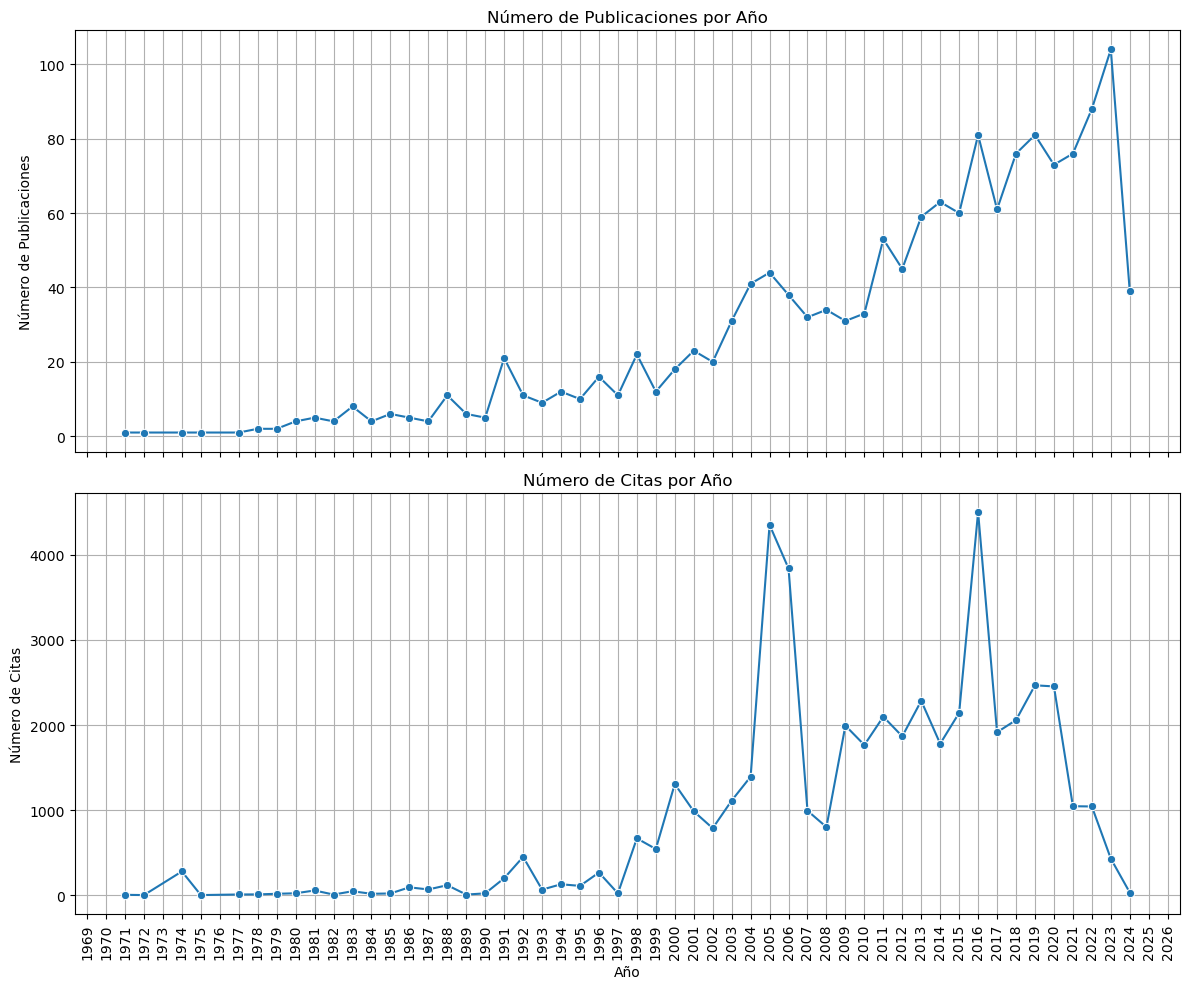

In [98]:
# Contar el número de publicaciones por año
publicaciones_por_anio = df_combined_cleaned.groupby('Year').size()

# Sumar el número de citas por año
citas_por_anio = df_combined_cleaned.groupby('Year')['Cited by'].sum()

# Crear una figura con dos subgráficos
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico de número de publicaciones por año
sns.lineplot(x=publicaciones_por_anio.index, y=publicaciones_por_anio.values, marker='o', ax=ax[0])
ax[0].set_title('Número de Publicaciones por Año')
ax[0].set_ylabel('Número de Publicaciones')
ax[0].grid(True)

# Gráfico de número de citas por año
sns.lineplot(x=citas_por_anio.index, y=citas_por_anio.values, marker='o', ax=ax[1])
ax[1].set_title('Número de Citas por Año')
ax[1].set_ylabel('Número de Citas')
ax[1].set_xlabel('Año')
ax[1].grid(True)

# Ajustar los ticks del eje X para mostrar más años
tick_frequency = 0.5
ax[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=len(publicaciones_por_anio)//tick_frequency))
plt.xticks(rotation=90)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [99]:
# Los años 2005, 2006 y 2016 en el gráfico de citas por año, corresponden a outliers

Palabras clave más comunes:
[('environmental impact', 45), ('water quality', 36), ('life cycle assessment', 33), ('sustainability', 29), ('climate change', 29), ('drinking water', 25), ('water resources', 24), ('environmental impacts', 21), ('water diversion', 20), ('water supply', 19), ('optimization', 19), ('water distribution systems', 17), ('water distribution', 17), ('drought', 15), ('water transfer', 15), ('groundwater', 14), ('sediment', 14), ('inter-basin water transfer', 13), ('risk assessment', 13), ('sustainable development', 13)]


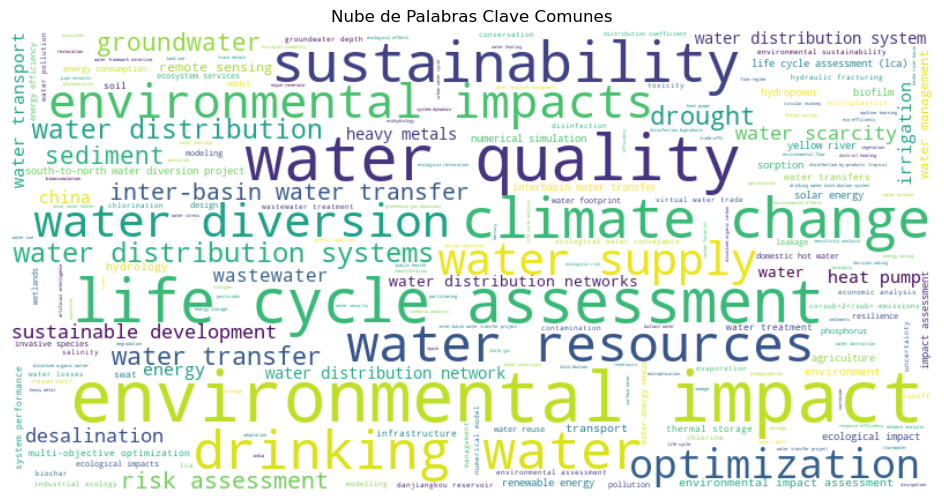

In [101]:
# Análisis de palabras clave comunes
keywords_combined = df_combined_cleaned['Author Keywords'].dropna().str.cat(sep=';').split(';')
keywords_combined = [kw.strip().lower() for kw in keywords_combined]
keywords_counter = Counter(keywords_combined)

# Mostrar las 20 palabras clave más comunes
keywords_common = keywords_counter.most_common(20)
print("Palabras clave más comunes:")
print(keywords_common)

# Generar una nube de palabras para las palabras clave
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keywords_counter)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Clave Comunes')
plt.show()

In [37]:
# Función para obtener estadística básica de las citas
def describe_dataframe(df):    
    df_cleaned = df.drop(columns=['Year'])
    return df_cleaned.describe()

describe_dataframe(df_combined_cleaned)

,Cited by
count,1499.000000
mean,32.457638
std,102.393355
min,0.000000
25%,1.000000
50%,10.000000
75%,32.000000
max,2163.000000


In [72]:
# Función para obtener estadística básica de las publicaciones por año
def describir_publicaciones_por_anio(df):
   
    # Agrupar el DataFrame por el año y contar el número de publicaciones por año
    publicaciones_por_anio = df.groupby('Year').size()
    
    # Describir las estadísticas del número de publicaciones por año
    descripcion = publicaciones_por_anio.describe()
    
    return descripcion


descripcion = describir_publicaciones_por_anio(df_combined_cleaned)
descripcion

count     52.000000
mean      28.826923
std       28.104651
min        1.000000
25%        5.000000
50%       19.000000
75%       44.250000
max      104.000000
dtype: float64

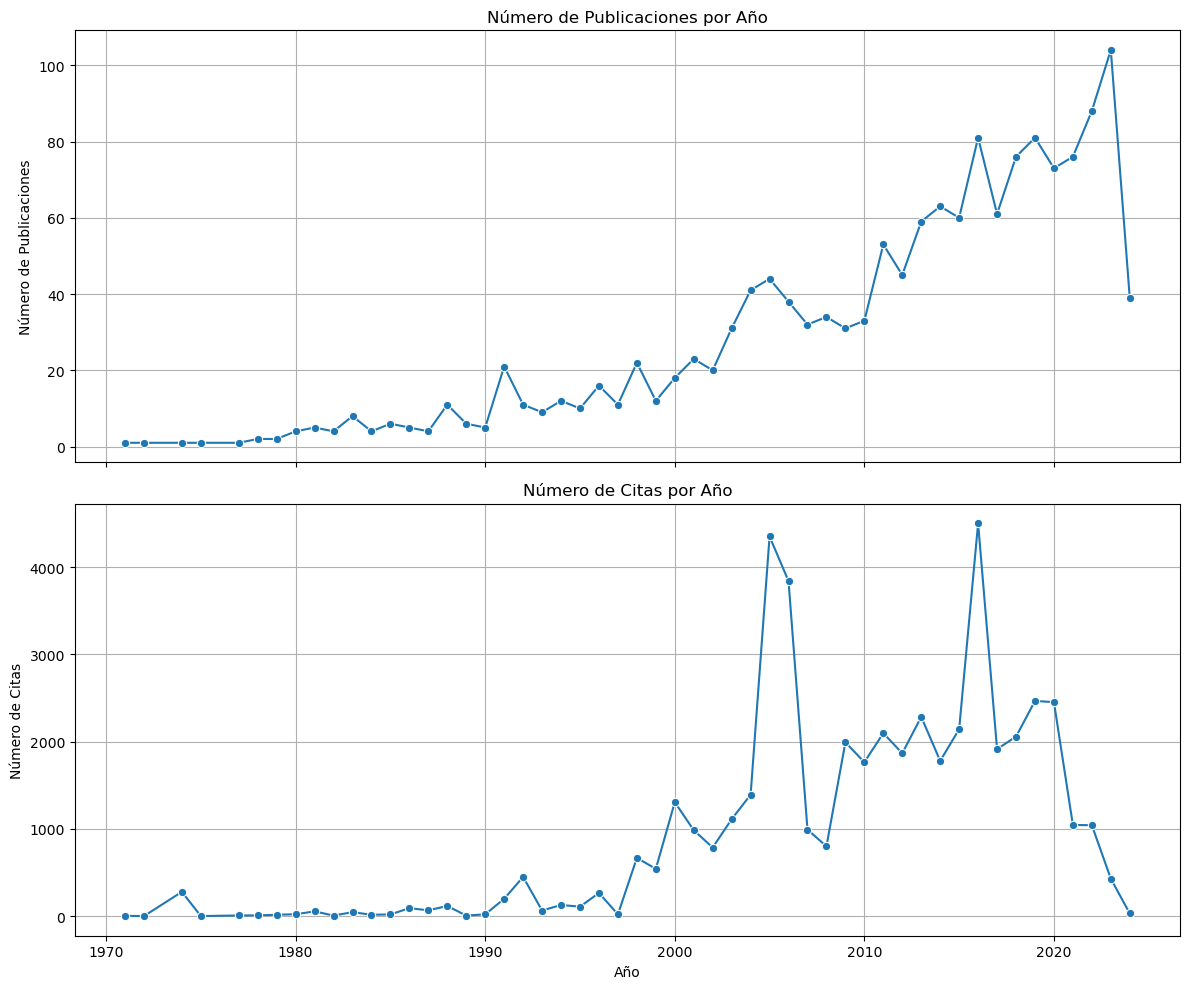

In [36]:
# Función para graficar número de publicaciones por año y número de citas por año
def graficar_publicaciones_y_citas(df):
       
    # Contar el número de publicaciones por año
    publicaciones_por_anio = df.groupby('Year').size()
    
    # Sumar el número de citas por año
    citas_por_anio = df.groupby('Year')['Cited by'].sum()
    
    # Crear una figura con dos subgráficos
    fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    
    # Gráfico de número de publicaciones por año
    sns.lineplot(x=publicaciones_por_anio.index, y=publicaciones_por_anio.values, marker='o', ax=ax[0])
    ax[0].set_title('Número de Publicaciones por Año')
    ax[0].set_ylabel('Número de Publicaciones')
    ax[0].grid(True)
    
    # Gráfico de número de citas por año
    sns.lineplot(x=citas_por_anio.index, y=citas_por_anio.values, marker='o', ax=ax[1])
    ax[1].set_title('Número de Citas por Año')
    ax[1].set_ylabel('Número de Citas')
    ax[1].set_xlabel('Año')
    ax[1].grid(True)
    
    # Mostrar la figura
    plt.tight_layout()
    plt.show()

# Llamar a la función para generar los gráficos
graficar_publicaciones_y_citas(df_combined_cleaned)

### 5) Visualización de Datos

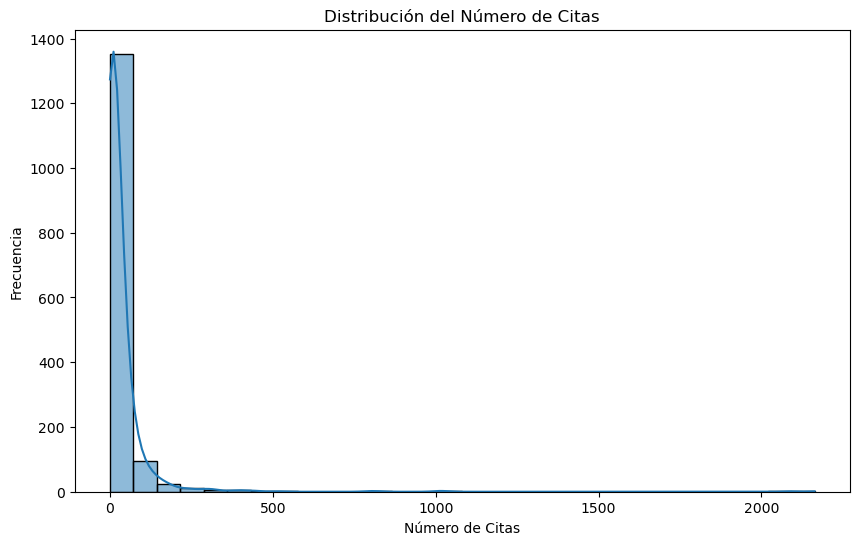

In [102]:
# Distribución del número de citas
plt.figure(figsize=(10, 6))
sns.histplot(df_combined_cleaned['Cited by'], bins=30, kde=True)
plt.title('Distribución del Número de Citas')
plt.xlabel('Número de Citas')
plt.ylabel('Frecuencia')
plt.show()

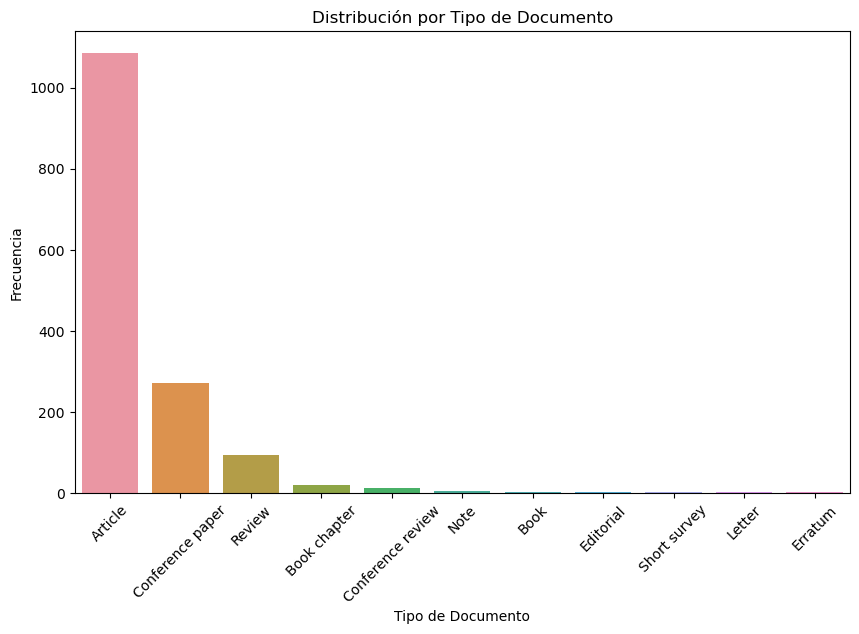

In [103]:
# Comportamiento de variables categóricas (Document Type)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined_cleaned, x='Document Type', order=df_combined_cleaned['Document Type'].value_counts().index)
plt.title('Distribución por Tipo de Documento')
plt.xlabel('Tipo de Documento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

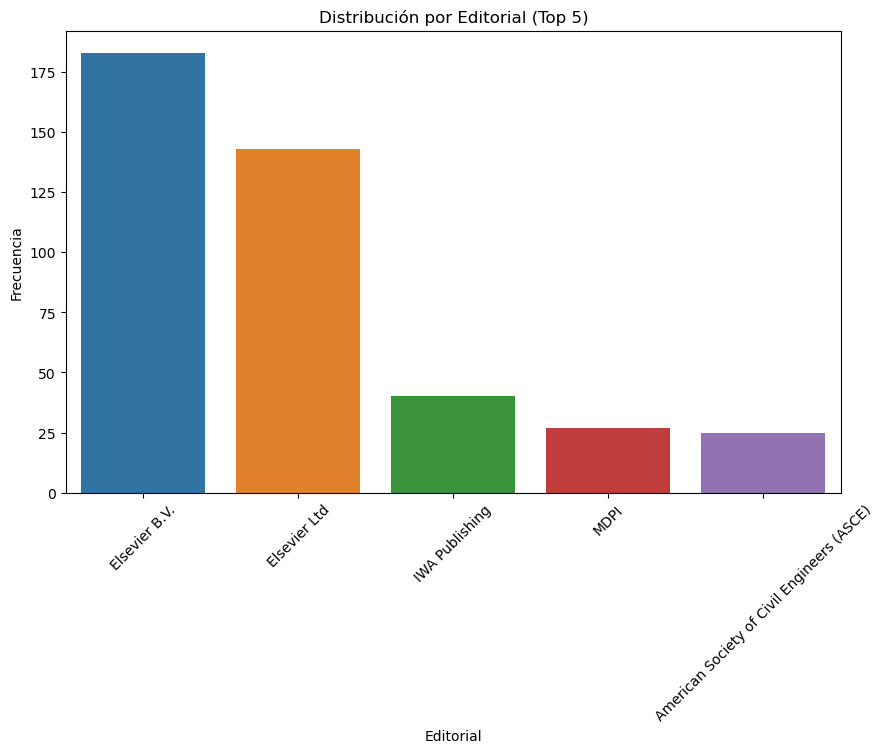

In [108]:
# Comportamiento de variables categóricas (Publisher)
plt.figure(figsize=(10, 6))
top_publishers = df_combined_cleaned['Publisher'].value_counts().head(5).index
sns.countplot(data=df_combined_cleaned[df_combined_cleaned['Publisher'].isin(top_publishers)], x='Publisher', order=top_publishers)
plt.title('Distribución por Editorial (Top 5)')
plt.xlabel('Editorial')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Conclusiones y recomendaciones
Se concluye que el interes en el tema crece de forma lineal, y que hubieron 3 años de mucho interés en el tema por razones que se desconocen al momento, el top 5 de palabras clave por autor es 1. Impacto ambiental, 2. Calidad del agua, 3. evaluación del ciclo de vida, 4. Sostenibilidad y 5. Cambio climático, la mayoria ade los papers son articulos y la editorial que destaca es Elsevier.
Como recomendación sería optimo combinar el analisis en python con otras herramientas como VOSviewer y Bibliometrix.

# Referencias bibliográficas

https://www.scopus.com/search/form.uri?zone=TopNavBar&origin=searchbasic&display=basic#basic

https://access.clarivate.com/login?app=wos&alternative=true&shibShireURL=https:%2F%2Fwww.webofknowledge.com%2F%3Fauth%3DShibboleth&shibReturnURL=https:%2F%2Fwww.webofknowledge.com%2F%3Fapp%3Dwos%26authCode%3Dnull%26locale%3Den-US&referrer=app%3Dwos%26authCode%3Dnull%26locale%3Den-US&roaming=true